## 선형회귀

선형회귀 모형(linear regression model)이란 독립변수 x를 통해 종속변수 y를 예측하는 방법의 하나로 독립변수 x와 가중치 벡터 w의 가중합을 이용해 y에 대한 예측값 $\hat{y}$를 계산하는 수식을 말한다.

\begin{align}
\hat{y} = w_1 x_1 + \cdots + w_N x_N
\end{align}

위 수식을 선형대수로 표현하면 다음과 같은 벡터의 내적으로 표현할 수 있다.

$$\hat{y} = w^Tx$$

예를 들어 아파트 가격을 예측하는 문제에서 입력값으로 면적($m^2$)를 입력 데이터 $x_1$, 층수를 $x_2$, 한강이 보이는지 여부를 $x_3$로 입력해 한강이 보이면 1, 그렇지 않으면 0이라고 가정하자

그리고 선형회귀 식을 도출했다고 가정하고 다음의 식이 완성된다고 가정하자.

\begin{align}
\hat{y} = 500 x_1 + 200 x_2 + 1000 x_3 
\end{align}

이 선형회귀 모형은 면적이 1$m^2$ 증가할수록 500만원이 상승하고 층수가 1층 높아질수록 200, 한강이 보이면 1000만원이 증가하고 그렇지 않으면 0이 더해지는 모형으로 이해할 수 있다.

위 식을 벡터의 내적으로 표현하면 다음과 같다.

\begin{split} 
\begin{align}
\hat{y} = \begin{bmatrix} 500 & 200 & 1000 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = w^T x 
\end{align}
\end{split}

## 제곱합

데이터의 분산(variance), 표준편차(standard devitation) 등을 계산하는 경우 각각의 데이터를 제곱한 뒤 이 값을 모두 더한 제곱합(sum of squares)을 계산해야 한다. 이 경우 벡터의 내적을 이용해 $x^Tx$로 표현할 수 있다.

\begin{split}
\begin{align}
x^T x = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} = \sum_{i=1}^{N} x_i^2
\end{align}
\end{split}

## 행렬과 행렬의 곱셈

행렬과 행렬의 곱셈의 결과는 행렬로 A행렬과 B행렬을 곱한 결과가 C행렬이라 할 때 C 행렬의 i번째 행, j번째 열의 원소 $C_{ij}$의 값은 A행렬의 전치 행렬의 i번째 행벡터와 B행렬의 j번째 열벡터의 내적이다.

\begin{align}
C = AB \; \rightarrow \; c_{ij} = a_i^T b_j 
\end{align}

위 정의가 성립되기 위해선 아래와 같이 앞의 행렬의 열의 수가 뒤 행렬의 행의 수와 동일해야한다.

\begin{align}
A \in \mathbf{R}^{N \times L} , \; B \in \mathbf{R}^{L \times M} \;  \rightarrow \; AB \in \mathbf{R}^{N \times M} 
\end{align}

실제 행렬의 곱을 계산해보자.

In [1]:
A = np.array([[1, 2, 3],
         [3, 4, 5]])
A

array([[1, 2, 3],
       [3, 4, 5]])

In [2]:
B = np.array([[1, 2],
             [3, 4],
             [5, 6]])
B

array([[1, 2],
       [3, 4],
       [5, 6]])

numpy를 이용한 행렬곱 계산을 위해선 @ 혹은 np.dot() 메소드를 이용한다.

In [3]:
A @ B

array([[22, 28],
       [40, 52]])

In [4]:
A.dot(B)

array([[22, 28],
       [40, 52]])

연산결과를 통해 사실상 행렬과 행렬의 곱셈은 벡터와 벡터의 내적 계산의 반복으로 이해할 수 있다.

## 연습문제

In [8]:
A

array([[1, 2, 3],
       [3, 4, 5]])

In [9]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

`1. AB와 BA가 같은가?`

In [10]:
A @ B

array([[22, 28],
       [40, 52]])

In [11]:
B @ A

array([[ 7, 10, 13],
       [15, 22, 29],
       [23, 34, 45]])

계산된 결과와 행렬의 모양이 다른것을 확인

`2. 아래의 A, B행렬에서 AB, BA를 계산`

In [12]:
A = np.array([[1, 2, 3]])
B = np.array([[4, 7],
             [5, 8],
             [6, 9]])
A @ B

array([[32, 50]])

In [13]:
B @ A

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

BA 계산 시 B 행렬의 열의 수(2)와 A행렬의 행의 수(1)이 맞지 않으므로 연산 불가

`3. A, B가 다음과 같을 때 AB, BA의 결과 비교`

In [14]:
A = np.array([[1, 2],
             [3, 4]])

B = np.array([[5, 6],
             [7, 8]])

A@B

array([[19, 22],
       [43, 50]])

In [15]:
B@A

array([[23, 34],
       [31, 46]])

결과 행렬의 shape은 같지만 연산 결과가 다름

4. A가 다음과 같을 때 $AA^T$와 $A^TA$를 계산

In [16]:
A = np.array([[1, 2],
             [3, 4],
             [5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [18]:
A @ A.T

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [19]:
A.T @ A

array([[35, 44],
       [44, 56]])

두 연산 결과 정방행렬이지만 3*3, 2*2로 shape이 다르고 연산 결과 또한 다르다.

6. x가 다음과 같을 때, $x^Tx와 xx^T$를 계산

In [21]:
X = np.array([[1],
             [2],
             [3]])
X

array([[1],
       [2],
       [3]])

In [22]:
X.T @ X

array([[14]])

In [23]:
X @ X.T

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

X.T @ X 연산 결과는 스칼라이고 X @ X.T의 연산 결과는 정방행렬이다.

## 교환법칙과 분배법칙

행렬의 곱셈은 행렬의 순서를 바꾸는 교환법칙이 성립하지 않지만 덧셈에 대한 분배 법칙은 성립한다.

\begin{align}
AB \neq BA  
\end{align}

$$A(B + C) = AB + AC$$

$$(A + B)C = AC + BC$$

In [27]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.array([[9, 8], [7, 6]])

교환법칙 성립 X

In [28]:
A @ B

array([[19, 22],
       [43, 50]])

In [29]:
B @ A

array([[23, 34],
       [31, 46]])

분배 법칙 성립

In [30]:
# 조건 1

A @ (B + C)

array([[42, 42],
       [98, 98]])

In [31]:
A @ B + A @ C

array([[42, 42],
       [98, 98]])

In [35]:
# 조건 2

(A + B) @ C

array([[110,  96],
       [174, 152]])

In [36]:
A @ C + B @ C

array([[110,  96],
       [174, 152]])

전치 연산도 덧셈과 뺄셈에 대한 분배법칙이 성립한다.

$$(A + B)^T = A^T + B^T$$

곱셈에 대한 분배법칙 또한 성립하지만 곱셈의 순서가 바뀐다.

$$(AB)^T = B^TA^T$$

$$(ABC)^T = C^TB^TA^T$$

In [37]:
(A + B).T

array([[ 6, 10],
       [ 8, 12]])

In [38]:
A.T + B.T

array([[ 6, 10],
       [ 8, 12]])

In [39]:
(A @ B).T

array([[19, 43],
       [22, 50]])

In [40]:
B.T @ A.T

array([[19, 43],
       [22, 50]])

## 연습문제

In [56]:
# 길이가 같은 일벡터와 행벡터의 곱은 행벡터 X를 반복하여 가지는 행렬과 같음을 보여라

X = np.array([[80],
             [90],
             [70]])

ones = np.ones(3)
ones = ones.reshape(-1,1)

ones @ X.T

array([[80., 90., 70.],
       [80., 90., 70.],
       [80., 90., 70.]])

\begin{split}
\begin{align}
\mathbf{1}_N^{} x^T
=
\begin{bmatrix}
{x}^T \\
{x}^T \\
\vdots    \\
{x}^T \\
\end{bmatrix}
\end{align}
\end{split}

In [58]:
# 행렬 X가 있을 때, 이 행렬의 각 열의 평균으로 이루어진 벡터 X_bar가 다음과 같음을 보여라

X = load_iris().data
N = X.shape[0]
ones = np.ones(N).reshape(-1,1)

1/N * X.T @ ones

array([[5.84333333],
       [3.05733333],
       [3.758     ],
       [1.19933333]])

\begin{align}
\bar{x} = \dfrac{1}{N} X^T \mathbf{1}_N  
\end{align}

In [65]:
# 행렬 X_bar는 동일한 벡터 x_bar.T를 N개 누적하여 만든 행렬이다.

In [46]:
from sklearn.datasets import load_iris
X = load_iris().data
N = X.shape[0]
ones = np.ones(N).reshape(-1,1)

X_bar = ((ones @ ones.T) @ X) / N
X_bar[:5]

array([[5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333],
       [5.84333333, 3.05733333, 3.758     , 1.19933333]])

\begin{align}
\bar{X} = \dfrac{1}{N} \mathbf{1}_N^{} \mathbf{1}_N^T X 
\end{align}

## 곱셈의 연결

연속된 행렬의 곱셈은 계산 순서를 임의의 순서로 진행해도 상관없다.

$$ABC = (AB)C = A(BC)$$

$$ABCD = ((AB)C)D = (AB)(CD) = A(BCD) = A(BC)D$$

In [68]:
A = np.array([[1, 2]])
B = np.array([[1, 2],
             [3, 4]])
C = np.array([[5],
             [6]])

(A@B)@C

array([[95]])

In [69]:
A@(B@C)

array([[95]])

## 항등행렬의 곱셈

어떤 행렬이든 항등행렬을 곱하면 그 값은 변하지 않는다.(1과 유사한 기능)

$$AI = IA = A$$

In [71]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)

In [72]:
A @ I

array([[1., 2.],
       [3., 4.]])

In [73]:
I @ A

array([[1., 2.],
       [3., 4.]])

In [74]:
A

array([[1, 2],
       [3, 4]])

## 행렬과 벡터의 곱

행렬의 곱셈 중 가장 널리 쓰이는 것은 행렬 $M$과 벡터 $v$의 곱 이다.

$$Mv$$

## 열벡터의 선형조합

행렬 $X$와 벡터 $w$의 곱은 행렬 $X$를 이루는 열벡터 $c_1, c_2,...,c_M$에 곱하는 벡터 $w$의 각 성분 $w_1, w_2, ..., w_M$으로 선형조합(linear combination)한 결과 벡터와 같다.

\begin{split}
\begin{align}
Xw=
\begin{bmatrix}
c_1 & c_2 & \cdots & c_M
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_M
\end{bmatrix}
=
w_1 c_1 + w_2 c_2 + \cdots + w_M c_M
\end{align}
\end{split}

In [78]:
# 다음의 행렬 X와 벡터 w에 대해 Xw를 구하는데 일반적인 방법과 행렬을 열벡터로 생각하여 연산을 수행해라

X = np.array([[1, 2, 3], [4, 5, 6]])
w = np.array([[2], [3], [4]])


# 일반적인 방법
X@w

array([[20],
       [47]])

In [88]:
# 행렬을 열벡터로 본다면

c1 = np.array([[1],[4]])
c2 = np.array([[2],[5]])
c3 = np.array([[3],[6]])

c1 * w[0] + c2 * w[1] + c3 * w[2]

array([[20],
       [47]])

추가적으로 아래와 같은 수식의 계산 결과는 $\lambda_1v_1$이 된다.

\begin{split}
\begin{align}
V\lambda = 
\begin{bmatrix}
v_1 & v_2 & v_3
\end{bmatrix}
\begin{bmatrix}
\lambda_{1} \\ 0 \\ 0 
\end{bmatrix}
= \lambda_1 v_1 
\end{align}
\end{split}

## 이미지 데이터의 벡터 선형조합

두 이미지 벡터의 선형조합을 이용해 두 이미지를 섞어 놓은듯한 모핑(morphing)효과를 얻을 수 있다.

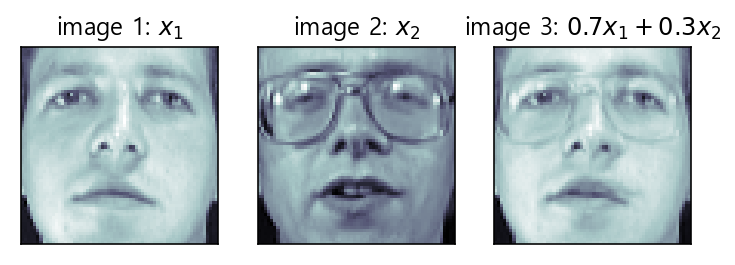

In [95]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

## 잔차

선형 회귀분석(linear regression)의 결과는 가중치 벡터(w)이고 예측치 $\hat{y}$은 가중치 벡터와 독립변수 데이터 레코드 즉, 벡터 $x_i$의 가중합 $w^Tx_i$가 된다. 이 때 실제 $y$값과 예측치 $\hat{y}$의 차이를 오차(error) 또는 잔차(residual) $e_i$라고 한다. 

이러한 잔찻값을 모든 독립변수 벡터에 대해 구하면 이는 잔차벡터 $e$가 된다.

$$e_i = y_i - \hat{y_i} = y_i - w^Tx_i$$

$$e = y - Xw$$

In [97]:
A = np.array([[1], [2], [3]])
B = np.array([[4], [5], [6]])

A @ B.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

## 잔차제곱합

잔차의 크기는 잔차벡터의 각 원소를 제곱한 후 더한 잔차 제곱합(RSS, Residual Sum of Squares)을 이용한다. 이 값은 $e^Te$로 구할 수 있으며 다음과 같이 계산한다.

\begin{align}
\sum_{i=1}^{N} e_i^2 = \sum_{i=1}^{N} (y_i - w^Tx_i)^2 = e^Te =  (y - Xw)^T (y - Xw) 
\end{align}

## 이차형식

위 식을 풀어쓰면 마지막 항은 $w^TX^TXw$ 형태가 된다. 여기서 $X^T$의 결과는 정방행렬로 이를 A라 하면 마지막 항은 $w^TAw$가 된다.

이처럼 행벡터 * 정방행렬 * 열벡터 의 형태를 이차형식이라 한다.

이차형식이 의미하는 것은 가능한 모든 i j 의 조합 쌍을 구한 후 i, j에 해당하는 원소 $x_i, y_i$를 가중치 $a_{ij}$와 같이 곱한 값의 총합이 된다.

\begin{split}
\begin{align}
\begin{aligned}
x^T A x 
&= 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,N} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N,1} & a_{N,2} & \cdots & a_{N,N} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} 
\\
&= \sum_{i=1}^{N} \sum_{j=1}^{N} a_{i,j} x_i x_j 
\end{aligned}
\end{align}
\end{split}

In [98]:
x = np.array([1, 2, 3])
x

array([1, 2, 3])

In [99]:
A = np.arange(1, 10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [101]:
x.T @ A @ x

228